#### K-nearest neighbors (KNN)
Introduction
K-nearest neighbors (KNN) are a typical example of a lazy learner. It's called lazy because it doesn't learn a discriminative function from the training data but memorizes the training dataset instead.

The KNN algorithm can be summarized by the following steps:

1 - Choose the number of k and a distance metric.

2 - Find the k-nearest neighbors of the data record that we want to classify.

3 - Assign the class label by majority vote.

This figure shows how a new data point is assigned the star class label based on majority voting among its three or six nearest neighbors:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs

In [2]:
X, y = make_blobs(n_samples=1000, centers=2,
                  random_state=0, cluster_std=1.3)

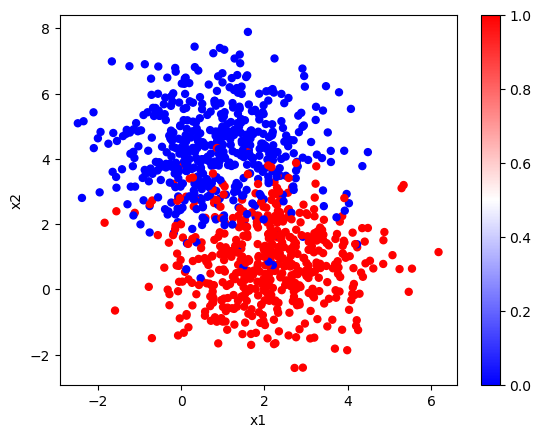

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='bwr')
plt.colorbar()
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [4]:
# calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)-1):
        distance +=  (row1[i] - row2[i])**2
        return (distance)**0.5

In [5]:
distance = euclidean_distance(X[0], X)

In [6]:
# Locate the most similar neighbors
def get_neighbors(train, test_row, num_neighbors):
 distances = list()
 for train_row in train:
    dist = euclidean_distance(test_row, train_row)
    distances.append((train_row, dist))
    distances.sort(key=lambda tup: tup[1])
    neighbors = list()
    #print(distances)
 for i in range(num_neighbors):
    neighbors.append(distances[i][0])
 return neighbors

For this task, calculate the 3 most similar records in the dataset to the first record, in order of similarity using the function `get_neighbors`.

> These cells are intentionally left black for you to practice

In [7]:
neighbors = get_neighbors(X, X[0], 3)
neighbors

[array([0.31372224, 3.73429074]),
 array([0.3122234 , 2.76896549]),
 array([0.3164972 , 2.93634319])]

In [8]:
#Use the following function to make predictions using 3 neighbors for the first row. 

# Make a classification prediction with neighbors
def predict_classification(train, test_row, num_neighbors):
 neighbors = get_neighbors(train, test_row, num_neighbors)
 output_values = [row[-1] for row in neighbors]
 prediction = max(set(output_values), key=output_values.count)
 return prediction


In [9]:
# Make a classification prediction with neighbors
def predict_classification(train, test_row, num_neighbors):
    neighbors = get_neighbors(train, test_row, num_neighbors)
    output_values = [row[-1] for row in neighbors]
    prediction = max(set(output_values), key=output_values.count)
    return prediction

# Adding a column to the array using concatenate()
Z=np.concatenate([X, y.reshape(-1,1)], axis=1)
prediction = predict_classification(Z, Z[0], 3)
print('Expected %d, Got %d.' % (y[0], prediction))

Expected 0, Got 0.


In [10]:
from sklearn.model_selection import train_test_split
# Split the dataset into the training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0) # 70% training and 30% test

In [11]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [12]:
from sklearn import metrics
#Predict Output
predicted= model.predict(X_test) 
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, predicted))

Accuracy: 0.9033333333333333


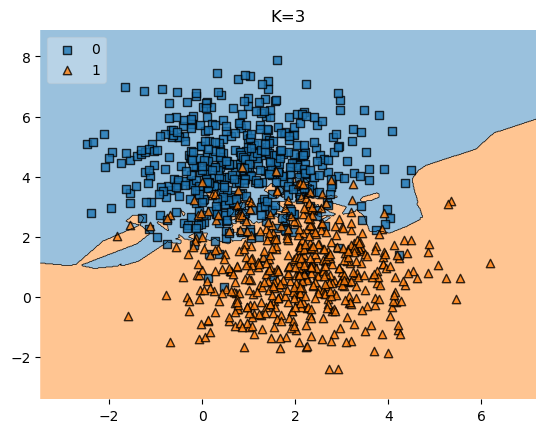

In [15]:
#!pip install mlxtend
from mlxtend.plotting import plot_decision_regions

# Plotting decision regions
plot_decision_regions(X ,y, clf=model, legend=2)

plt.title('K=3')
plt.show()

##### Conclusions
To sum up, let's summarize some advantages of k-nearest neighbors (KNN) include:

The KNN algorithm is easy to implement and understand, making it a good choice for many applications.

Unlike other machine learning algorithms, KNN does not require a training phase, which makes it more efficient.

However, there are also some disadvantages of KNN, like:

KNN can be computationally expensive as it requires distance calculations between all instances in the dataset at each prediction.

kNN can be sensitive to irrelevant or noisy features in the data, which can negatively impact the performance of the model.

KNN is sensitive to the scale of the data, so it is important to normalize the data before using this algorithm.

Requires large memory.